In [645]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt    
from matplotlib import pyplot
from nltk.stem import PorterStemmer

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words("english"))

sns.set_style("white")
sns.set_style("ticks")
fontsize = 14
figsize = (12,3)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\5005901438/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("train_2kmZucJ.csv",encoding='latin-1')

In [643]:
pd.set_option('display.max_colwidth', 1) 
data[data['label'] == 0].head(3)

,id,label,tweet,len,punct,emoticon,emoji,mention,hashtag,emoticon_count,punct_count,profanity
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,116,13.793,,,,#fingerprint #Pregnancy #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,0,13.793,0
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperiasâ¦ http://instagram.com/p/YGEt5JC6JM/,117,13.675,happy,,,#yay #Sony #Xperia #S #sonyexperias,1,13.675,0
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,109,16.514,,,,#talk #makememories #unplug #relax #iphone #smartphone #wifi #connect,0,16.514,0


In [642]:
data[data['label'] == 1].head(3)

,id,label,tweet,len,punct,emoticon,emoji,mention,hashtag,emoticon_count,punct_count,profanity
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,102,4.902,,,,,0,4.902,0
5,6,1,iPhone software update fucked up my phone big time Stupid iPhones,55,0.000,,,,,0,0.000,0
10,11,1,hey #apple when you make a new ipod dont make it a new color or .2inches thinner make it not crash every five fuckin minite.,100,3.000,,,,#apple,0,3.000,0


In [641]:
from sklearn.model_selection import train_test_split

X = data['tweet']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [646]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

tfidf = TfidfVectorizer(stop_words=stopwords_set,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

# A pipeline is what chains several steps together, once the initial exploration is done. 
# For example, some codes are meant to transform features — normalise numericals, or turn text into vectors, 
# or fill up missing data, they are transformers; other codes are meant to predict variables by fitting an algorithm,
# they are estimators. Pipeline chains all these together which can then be applied to training data
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<function prepr...e, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [648]:
y_test_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('logistic accuracy:',accuracy_score(y_test,y_test_pred))
print('classification report:\n',classification_report(y_test,y_test_pred))

logistic accuracy: 0.8741582491582491
classification report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1737
           1       0.81      0.70      0.75       639

   micro avg       0.87      0.87      0.87      2376
   macro avg       0.85      0.82      0.83      2376
weighted avg       0.87      0.87      0.87      2376



# Let's add more Features

## Adding Lengh feature

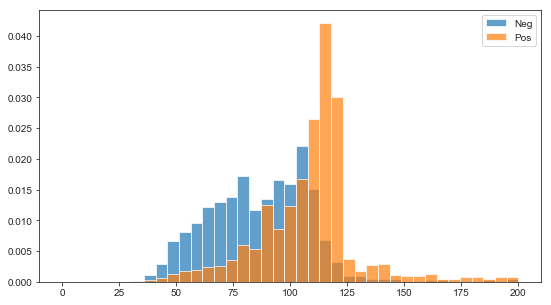

In [652]:
def get_length(text):
    return len(text) - text.count(" ")

data['len'] = data['tweet'].apply(get_length)

%matplotlib inline
pyplot.figure(figsize=(9,5))
bins = np.linspace(0,200,num=40)
pyplot.hist(data[data['label']==1]['len'],bins,alpha=0.7,label='Neg', density=True)
pyplot.hist(data[data['label']==0]['len'],bins,alpha =0.7,label ='Pos', density=True)
pyplot.legend(loc ='upper right')
pyplot.show()

## Adding Punctuation count feature

<function matplotlib.pyplot.show(*args, **kw)>

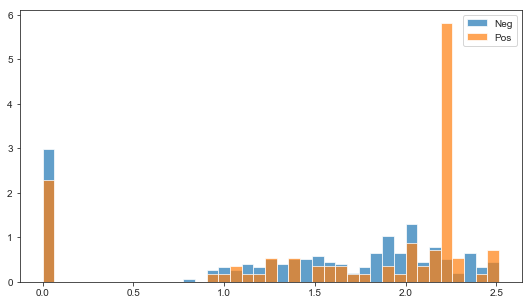

In [656]:
def get_punct_count(text):
    return count_punct(text)


data['punct_count'] = data['tweet'].apply(get_punct_count)
# punctuation 
%matplotlib inline
pyplot.figure(figsize=(9,5))
i=4
bins = np.linspace(0,40**(1/i),num=40)
pyplot.hist(data[data['label']==1]['punct_count'],bins,alpha=0.7,label='Neg', density=True)
pyplot.hist(data[data['label']==0]['punct_count'],bins,alpha =0.7,label ='Pos', density=True)
pyplot.legend(loc ='upper right')
pyplot.show

## Adding Punctuation count feature

<function matplotlib.pyplot.show(*args, **kw)>

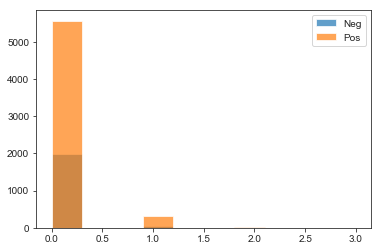

In [658]:
import re
def get_emoticon_count(text):
    return len(re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text))

data['emoticon_count'] = data['tweet'].apply(get_emoticon_count)

# emoticon
pyplot.hist(data[data['label']==1]['emoticon_count'], label ='Neg', alpha=0.7)
pyplot.hist(data[data['label']==0]['emoticon_count'], label='Pos', alpha=0.7)
pyplot.legend(loc ='upper right')
pyplot.show

## Processing emoticon

In [663]:
#processing emoticon
def get_emoticon(text):
    return ' '.join(re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text))

def translate_emoticon(text):
    text = re.sub('(?::|;|=)(?:-)?(?:\)|D|P)', 'happy', text)
    text = re.sub('(?::|;|=)(?:-)?(?:\()', 'sad', text)
    return text

data['emoticon'] = data['tweet'].apply(get_emoticon)
print(data.emoticon.unique())
data['emoticon'] = data['emoticon'].apply(translate_emoticon)
print(data.emoticon.unique())

['' ':)' ';)' ':(' ':D' ':P' ':) :) :)' ';D' ':) :D' '=D' ':D :P' ':-)'
 ':-(' ':) :)' ':D :D' ';-)' ':-D' '=)' ':D :D :D' ':P :)' ':) ;) :)'
 ':( :(' '=P' ':-) :-) :-)' ':) :-D' ';) :(' '=(' ':( :D' ':D :-D']
['' 'happy' 'sad' 'happy happy happy' 'happy happy' 'sad sad' 'happy sad'
 'sad happy']


## Adding Profanity detect feature

<function matplotlib.pyplot.show(*args, **kw)>

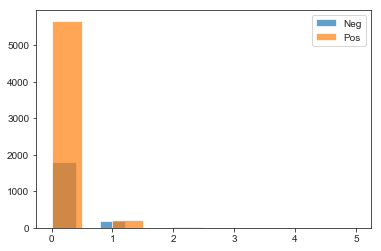

In [678]:
def get_profanity_count(text):
    return len(re.findall('\$[^A-Za-z0-9 ]+', text))

data['profanity_count'] = data['tweet'].apply(get_profanity_count)

pyplot.hist(data[data['label']==1]['profanity_count'], label ='Neg', alpha=0.7)
pyplot.hist(data[data['label']==0]['profanity_count'], label='Pos', alpha=0.7)
pyplot.legend(loc ='upper right')
pyplot.show

## Upsampling

Text(0.5, 1.0, 'Sentiment distribution')

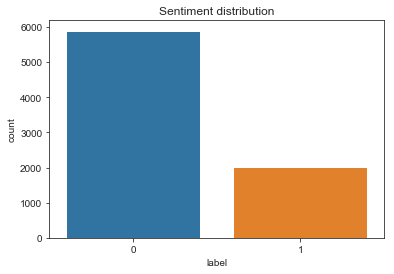

In [5]:
sns.countplot(data.label)
plt.xlabel('label')
plt.title('Sentiment distribution')

In [716]:
data_1 = data[data['label'] == 1]
data_0 = data[data['label'] == 0]

data_1_oversample = data_1.sample(replace = True, n = data_0.shape[0])
data_1_oversample.shape
data_oversample = pd.concat([data_1_oversample, data_0], axis=0)

Text(0.5, 1.0, 'Sentiment distribution')

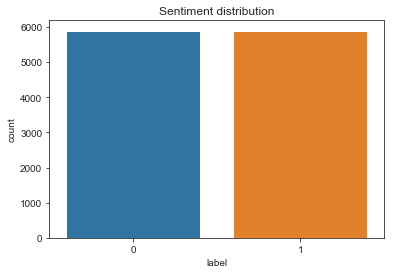

In [717]:
sns.countplot(data_oversample.label)
plt.xlabel('label')
plt.title('Sentiment distribution')

In [673]:
#https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis
#hashtag

def remove_mention(text):
    return re.sub('(@[A-Za-z0-9]+)', '', text)

def get_mention(text):
    return ' '.join(re.findall('(@[A-Za-z0-9]+)', text))

def get_hashtag(text):
    return ' '.join(re.findall('(#[A-Za-z0-9]+)', text))

In [677]:
data['hashtag'] = data['tweet'].apply(get_hashtag)
data.hashtag.unique()

array(['#fingerprint #Pregnancy #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone',
       '#yay #Sony #Xperia #S #sonyexperias',
       '#talk #makememories #unplug #relax #iphone #smartphone #wifi #connect',
       ..., '#lol #liveoutloud #selfie #smile #sony #music #headphones',
       '#smart #pocket #wifi #ipad #samsung #s3 #gadget',
       '#Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew'],
      dtype=object)

In [700]:
def create_extra_feature(df):
    df['len'] = df['tweet'].apply(get_lenth)
    df['punct_count'] = df['tweet'].apply(get_punct_count)
    df['emoticon_count'] = df['tweet'].apply(get_emoticon_count)
    df['emoticon'] = df['tweet'].apply(get_emoticon)
    df['emoticon'] = df['emoticon'].apply(translate_emoticon)
    df['profanity_count'] = df['tweet'].apply(get_profanity_count)
    df['tweet'] = df['tweet'].apply(remove_mention)
    return df[['len', 'punct_count', 'emoticon_count', 'emoticon', 'profanity_count', 'tweet']]

In [701]:
#https://towardsdatascience.com/a-beginners-guide-on-sentiment-analysis-with-rnn-9e100627c02e
#https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948

In [742]:
from sklearn.base import TransformerMixin, BaseEstimator
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X[self.column]
    
class MultiLabelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column, classes):
        self.column = column
        self.classes = classes
        
    def fit(self, X, y=None):
        self.mlb = MultiLabelBinarizer(classes=self.classes)
        self.mlb.fit(X[self.column])
        return self

    def transform(self, X):
        return self.mlb.transform(X[self.column])
    
def preprocessor(text):
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ')
    return text

def tokenizer_porter(text):
    stem_token = []
    for wrd in text.split(' '):
        if not wrd.lower() in stopwords_set:
            stem_token.append(PorterStemmer().stem(wrd))
    return stem_token

In [743]:
class ModelTransformer(TransformerMixin):

    def __init__(self, model):
        self.model = model

    def fit(self, *args, **kwargs):
        self.model.fit(*args, **kwargs)
        return self

    def transform(self, X, **transform_params):
        return DataFrame(self.model.predict(X))

In [770]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# create pipeline
pipeline = Pipeline([
    ('features', FeatureUnion(
        # list of features
        transformer_list=[
            ('tweet_tfidf', Pipeline([
                    ('selector', ColumnSelector(column='tweet')),
                    ('tfidf', TfidfVectorizer(stop_words=stopwords_set, min_df=1, ngram_range=(1, 4), tokenizer=tokenizer_porter, preprocessor=preprocessor))
                    ])),
            ('numeric_features', Pipeline([
                    ('selector', ColumnSelector(column=['len', 'punct_count', 'emoticon_count', 'profanity_count'])),
                    ('numeric', StandardScaler())
                    ])),
            ('emoticon_tfidf', Pipeline([
                    ('selector', ColumnSelector(column='emoticon')),
                    ('tfidf', TfidfVectorizer(min_df=1, ngram_range=(1, 4), tokenizer=tokenizer_porter))
                    ]))
        ],
        # weight components in FeatureUnion
        transformer_weights={
            'tweet_tfidf': 1.0,
            'numeric_features': 1.0,
            'emoticon_count': 1.0,
            'emoticon_tfidf': 1.0,
            'punct_count': 1.0
        }
    )),
    ('classifier', OneVsRestClassifier(LinearSVC(), n_jobs=-1))
])

In [771]:
from sklearn.model_selection import train_test_split
X = create_extra_feature(data_oversample)
y = data_oversample['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#X_train = create_extra_feature(data_1_oversample)
#y_train = data_1_oversample['label']

In [772]:
pipeline.fit(X_train, y_train)
lr_predict = pipeline.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [773]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('logistic accuracy:',accuracy_score(y_test,lr_predict))
print('classification report:\n',classification_report(y_test,lr_predict))

logistic accuracy: 0.9375176703420979
classification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      1748
           1       0.90      0.98      0.94      1789

   micro avg       0.94      0.94      0.94      3537
   macro avg       0.94      0.94      0.94      3537
weighted avg       0.94      0.94      0.94      3537



In [774]:
data_predict_wrong = X_test

In [775]:
data_predict_wrong['label'] = y_test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [776]:
data_predict_wrong['predict'] = lr_predict

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [777]:
data_predict_wrong[data_predict_wrong['label'] != data_predict_wrong['predict']]

,len,punct_count,emoticon_count,emoticon,profanity_count,tweet,label,predict
7183,58,3.448,0,,0,for me that would be one of the worst days of my life! #dontcareforcubs,0,1
2029,173,9.827,0,,0,Samsung Galaxy Note 7 Blast Official Samsung Report http://gotechgyaan.com/why-samsung-galaxy-note-7-blast â¦ #samsung #note7 #samsungphoneblast #samsungmobilepic.twitter.com/kr5ztS7pzV,1,0
4823,87,5.747,0,,0,#EverydayGrand #Samsung #GALAXYGrand2 just did my birdy tweet #weekend guys. For all married winners,0,1
4246,105,12.381,0,,1,_beag god that's not good! We need a day planned when I'm back!#misscorrigan $&@*# my phone is broke again! haven't dropped it,0,1
3647,81,11.111,0,,0,RT : Isn't me or does the iphone lighting cable break so easily ... On like my 7th charger -.- #apple,1,0
360,46,4.348,0,,0,In litetally one week i will own the iPhone 4S. Fuck yes.,0,1
54,57,1.754,0,,0,"thinner faster amazing, I hated iPad and will be getting one so yeâ¦",0,1
3910,47,12.766,0,,0,": _Redux Hey! that's how I type on my iPhone Heis, bsjueb!",0,1
3087,47,10.638,0,,0,#Apple care warranty: I LOVE YOU. You just saved me $900.,0,1
4378,89,5.618,0,,0,"my goodness, I don't even have to type to text anymore. this is what life should be like all the time. #iPhone",0,1


In [778]:
print(tokenizer_porter(preprocessor('my goodness, I dont even have to type to text anymore. this is what life should be like all the time')))

['good', 'dont', 'even', 'type', 'text', 'anymor', 'life', 'like', 'time', '']


In [753]:
data_test = pd.read_csv("test_oJQbWVk.csv",encoding='latin-1')

In [754]:
data_test['len'] = data_test['tweet'].apply(lambda x : len(x) - x.count(" "))
data_test['emoticon'] = data_test['tweet'].apply(get_emoticon)
data_test['punct_count'] = data_test['tweet'].apply(lambda x : count_punct(x))
data_test['emoticon_count'] = data_test['tweet'].apply(lambda x : len(re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', x)))

In [755]:
X = data_test[['tweet', 'len', 'punct_count','emoticon', 'emoticon_count']]
X['tweet'] = X['tweet'].apply(remove_mention)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [779]:
y_test_pred = pipeline.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [ ]:
data_test['label'] = y_test_pred

In [757]:
data_test

,id,tweet,len,emoticon,punct_count,emoticon_count
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,64,,9.375,0
1,7922,currently shitting my fucking pants. #apple #iMac #cashmoney #raddest #swagswagswag http://instagr.am/p/UUIS0bIBZo/,105,,12.381,0
2,7923,"I'd like to puts some CD-ROMS on my iPad, is that possible?' â Yes, but wouldn't that block the screen?\n",87,,9.195,0
3,7924,"My ipod is officially dead. I lost all my pictures and videos from the 1D and 5sos concert,and from Vet Camp #hatinglife #sobbing",107,,3.738,0
4,7925,Been fighting iTunes all night! I only want the music I $&@*# paid for,57,,10.526,0
5,7926,#Repost @getbakednfried with repostapp ã»ã»ã» to announce we will have our #apple #bourbonâ¦ https://www.instagram.com/p/BK5okHOgWSS/,124,,9.677,0
6,7927,This new apple software update is really doing things to my phone. Bad things apple,69,,1.449,0
7,7928,BABY #iPhone #iphone6s #gold #new #apple #appleisbest #64GB #gegÃ¶nnt #aaaaah https://www.instagram.com/p/BAUx8eQtKez/,108,,15.741,0
8,7929,I'm confused...why did I have to take the time to set a appointment. To still be waiting her 45 minutes after the fact,96,,5.208,0
9,7930,Fruit just tastes better when you pick it yourself. #apple #healthy #fruit #nyc by â¦ http://ift.tt/1RI7dyo pic.twitter.com/ZuO9tHmEK3,119,,10.924,0


In [639]:
data_test[['id','label']].to_csv('data_test.csv')

In [609]:
text = 'hello @$&@*!# morning'

print(re.sub('(@$&@*#)?[^A-Za-z0-9 ]+', '', text))


#return re.sub('(@[A-Za-z0-9]+)', '', text)

hello  morning
